<div style="font-size:12pt; font-weight:bold;">Netanomics Collaborative Environment: Demonstration Analysis</div>
<div style="font-size:12pt;">Richard McElreath's (2021) Two Mom's Analysis</div>
<div style="font-size:12pt;">Jonathan H. Morgan, Ph.D.</div>
<div style="font-size:12pt;">22 January 2025</div>

<div style="font-size:12pt; font-weight:bold;">Preamble</div>

In [1]:
#Python Packages
import sys
import os
import subprocess
import pexpect

from PIL import Image, ImageChops
from IPython.display import display

In [2]:
#Loading Julia
from julia.api import Julia
jl = Julia(compiled_modules=False)

from julia import Main
Main.eval('println("Hello from Julia with workaround!")')

Hello from Julia with workaround!


In [3]:
%load_ext julia.magic

Initializing Julia interpreter. This may take some time...


In [4]:
%%julia
#   Activating Local Environment
    cd("/mnt/d/GitHub_Repositories/Netanomics_Analysts_Collaborative_Environment/Workflow_Demonstration")
    using Pkg
    Pkg.activate("julia_env")
    Pkg.status()

#   Loading Packages
    using DataFrames
    using julia_env

  Activating project at `/mnt/d/GitHub_Repositories/Netanomics_Analysts_Collaborative_Environment/Workflow_Demonstration/julia_env`


Project julia_env v0.1.0
Status `/mnt/d/GitHub_Repositories/Netanomics_Analysts_Collaborative_Environment/Workflow_Demonstration/julia_env/Project.toml`
  [336ed68f] CSV v0.10.15
  [8be319e6] Chain v0.6.0
  [861a8166] Combinatorics v1.0.2
  [a93c6f00] DataFrames v1.7.0
  [31c24e10] Distributions v0.25.117
  [7073ff75] IJulia v1.26.0
  [438e738f] PyCall v1.96.4
  [6f49c342] RCall v0.14.6
  [10745b16] Statistics v1.11.1
  [44cfe95a] Pkg v1.11.0
  [de0858da] Printf v1.11.0
  [9a3f8284] Random v1.11.0


In [2]:
# Loading R
%load_ext rpy2.ipython

/mnt/d/GitHub_Repositories/Netanomics_Analysts_Collaborative_Environment/Workflow_Demonstration/python_env/lib/python3.8/site-packages/rpy2/ipython/rmagic.py:85: UserWarning: The Python package `pandas` is strongly recommended when using `rpy2.ipython`. Unfortunately it could not be loaded, as we did not manage to load `numpy` in the first place (error: No module named 'numpy').
  warnings.warn('The Python package `pandas` is strongly '


In [3]:
%%R
# Options
    options(stringsAsFactors = FALSE)
    options(scipen=999)
    options(mc.cores = parallel::detectCores())

#   Packages
    library(cmdstanr)     #Used to run cmdstan from R
    library(bayesplot)    #Used to generate Bayesian diagnostic plots
    library(dplyr)        #Data Management
    library(posterior)    #Used to sample posterior distribution
    library(loo)          #Used for Leave-One-Out Cross Validation
    library(knitr)        #Used here to generate Dataplot Style Axes
    library(sysfonts)     #Used to link to system fonts
    library(extrafont)    #Used to load system fonts
    library(showtext)     #Used to display font in images

This is cmdstanr version 0.8.1
- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr
- Use set_cmdstan_path() to set the path to CmdStan
- Use install_cmdstan() to install CmdStan
This is bayesplot version 1.11.1
- Online documentation and vignettes at mc-stan.org/bayesplot
- bayesplot theme set to bayesplot::theme_default()
   * Does _not_ affect other ggplot2 plots
   * See ?bayesplot_theme_set for details on theme setting

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

This is posterior version 1.6.0

Attaching package: ‘posterior’

The following object is masked from ‘package:bayesplot’:

    rhat

The following objects are masked from ‘package:stats’:

    mad, sd, var

The following objects are masked from ‘package:base’:

    %in%, match

This is loo version 2.8.0
- Online documentation and vignettes at mc-stan.org/loo
- As 

In [ ]:
%%R
#   Loading Fonts
    font_add("Palatino Linotype", "/usr/share/fonts/truetype/Palatino Linotype/Palatino Linotype.ttf")
    loadfonts(device = "pdf")

#   Checking that I am pointing to cmdstan
    set_cmdstan_path("/home/jhm18/cmdstan")
    cmdstan_path()
    cmdstan_version()

#   Setting Seed
    set.seed(10271998) 

#   Sourcing Functions
    source("/mnt/d/GitHub_Repositories/Netanomics_Analysts_Collaborative_Environment/Workflow_Demonstration/R_functions/Bayesian_Modeling_Support_Functions.R")

<div style="font-size:12pt; font-weight:bold;">Proposed Causal Model</div>

In [22]:
%%bash
cd /mnt/d/GitHub_Repositories/Netanomics_Analysts_Collaborative_Environment/Workflow_Demonstration/Graphviz_functions && \
dot -Tpng Two_Moms_Causal_Diagram.gv -o causal_diagram.png

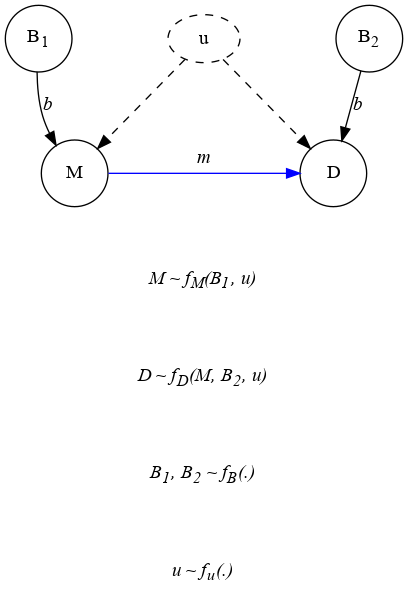

In [23]:
# Display Causal Diagram
file_path = "/mnt/d/GitHub_Repositories/Netanomics_Analysts_Collaborative_Environment/Workflow_Demonstration/Graphviz_functions/causal_diagram.png"
img = Image.open(file_path)
display(img)

<div style="font-size:12pt; font-weight:bold;">Create Synthetic Data</div>

In [ ]:
%%julia
#   Generating Data
    sim_data = generate_synthetic_data()

#   Moving Into a DataFrame for Export to Dataplot
    sim_df = DataFrame(U = sim_data["U"], M = sim_data["M"], B2 = sim_data["B2"], 
                        B1 = sim_data["B1"], D = sim_data["D"])

#   Looking at Data
    println(summarize_df(sim_df, n=5, num_cols=6));

200×5 DataFrame
 Row  U          M          B2     B1     D
      Float64    Float64    Int64  Int64  Float64
────────────────────────────────────────────────────
 1    -1.26301   0.551022   0      1      -0.887439
 2    1.10342    5.0479     0      1      1.64358
 3    0.0918798  -0.988813  1      0      0.662284
 4    0.564019   1.28469    0      0      0.63536
 5    0.556318   0.235488   0      0      0.280672

 196  -0.713484  0.0196384  1      0      2.22689
 197  0.428668   1.32319    0      0      0.219888
 198  -1.97108   -0.19717   0      1      -0.843911
 199  0.926256   1.56749    0      0      1.56937
 200  -0.268078  1.27341    0      1      1.75503nothing

In [11]:
%%julia
#   Exporting to Dataplot for some Initial Descriptive Analyses
    cd("Dataplot_functions")
    dataplot_export(sim_df, "two_moms")
    cd("../")

In [12]:
%%julia
#   Exporting to R to Specify a Probabilistic Model
    cd("R_functions")
    R_export(sim_data, pwd(), "two_moms", "two_moms")
    cd("../")

<div style="font-size:12pt; font-weight:bold;">Descriptive Analyses</div>

In [13]:
# Change Directory to Dataplot_functions
os.chdir('/mnt/d/GitHub_Repositories/Netanomics_Analysts_Collaborative_Environment/Workflow_Demonstration/Dataplot_functions')

# Start a NIST Dataplot session
dp = pexpect.spawn("dataplot")

In [14]:
dp.sendline("CALL Two_Moms_4Plot.DP")  # Define a variable
dp.expect(r">")

0

In [16]:
dp.sendline("SUMMARY D")  # Define a variable
dp.expect(r">")
print(dp.before.decode())


SUMMARY D
  
             Summary of        200 Observations
  
 Response Variable: D
  
  
 --------------------------------------------------------------------------
          Location Measures           |         Dispersion Measures
 --------------------------------------------------------------------------
             Midrange:         0.7072 |               Range:        10.4263
                 Mean:         0.7742 |  Standard Deviation:         1.6782
              Midmean:         0.7786 |   Average Abs. Dev.:         1.2758
               Median:         0.7532 |             Minimum:        -4.5060
                                      |      Lower Quartile:        -0.2557
                                      |         Lower Hinge:        -0.2546
                                      |         Upper Hinge:         1.8008
                                      |      Upper Quartile:         1.8093
                                      |             Maximum:         5.9204
 --

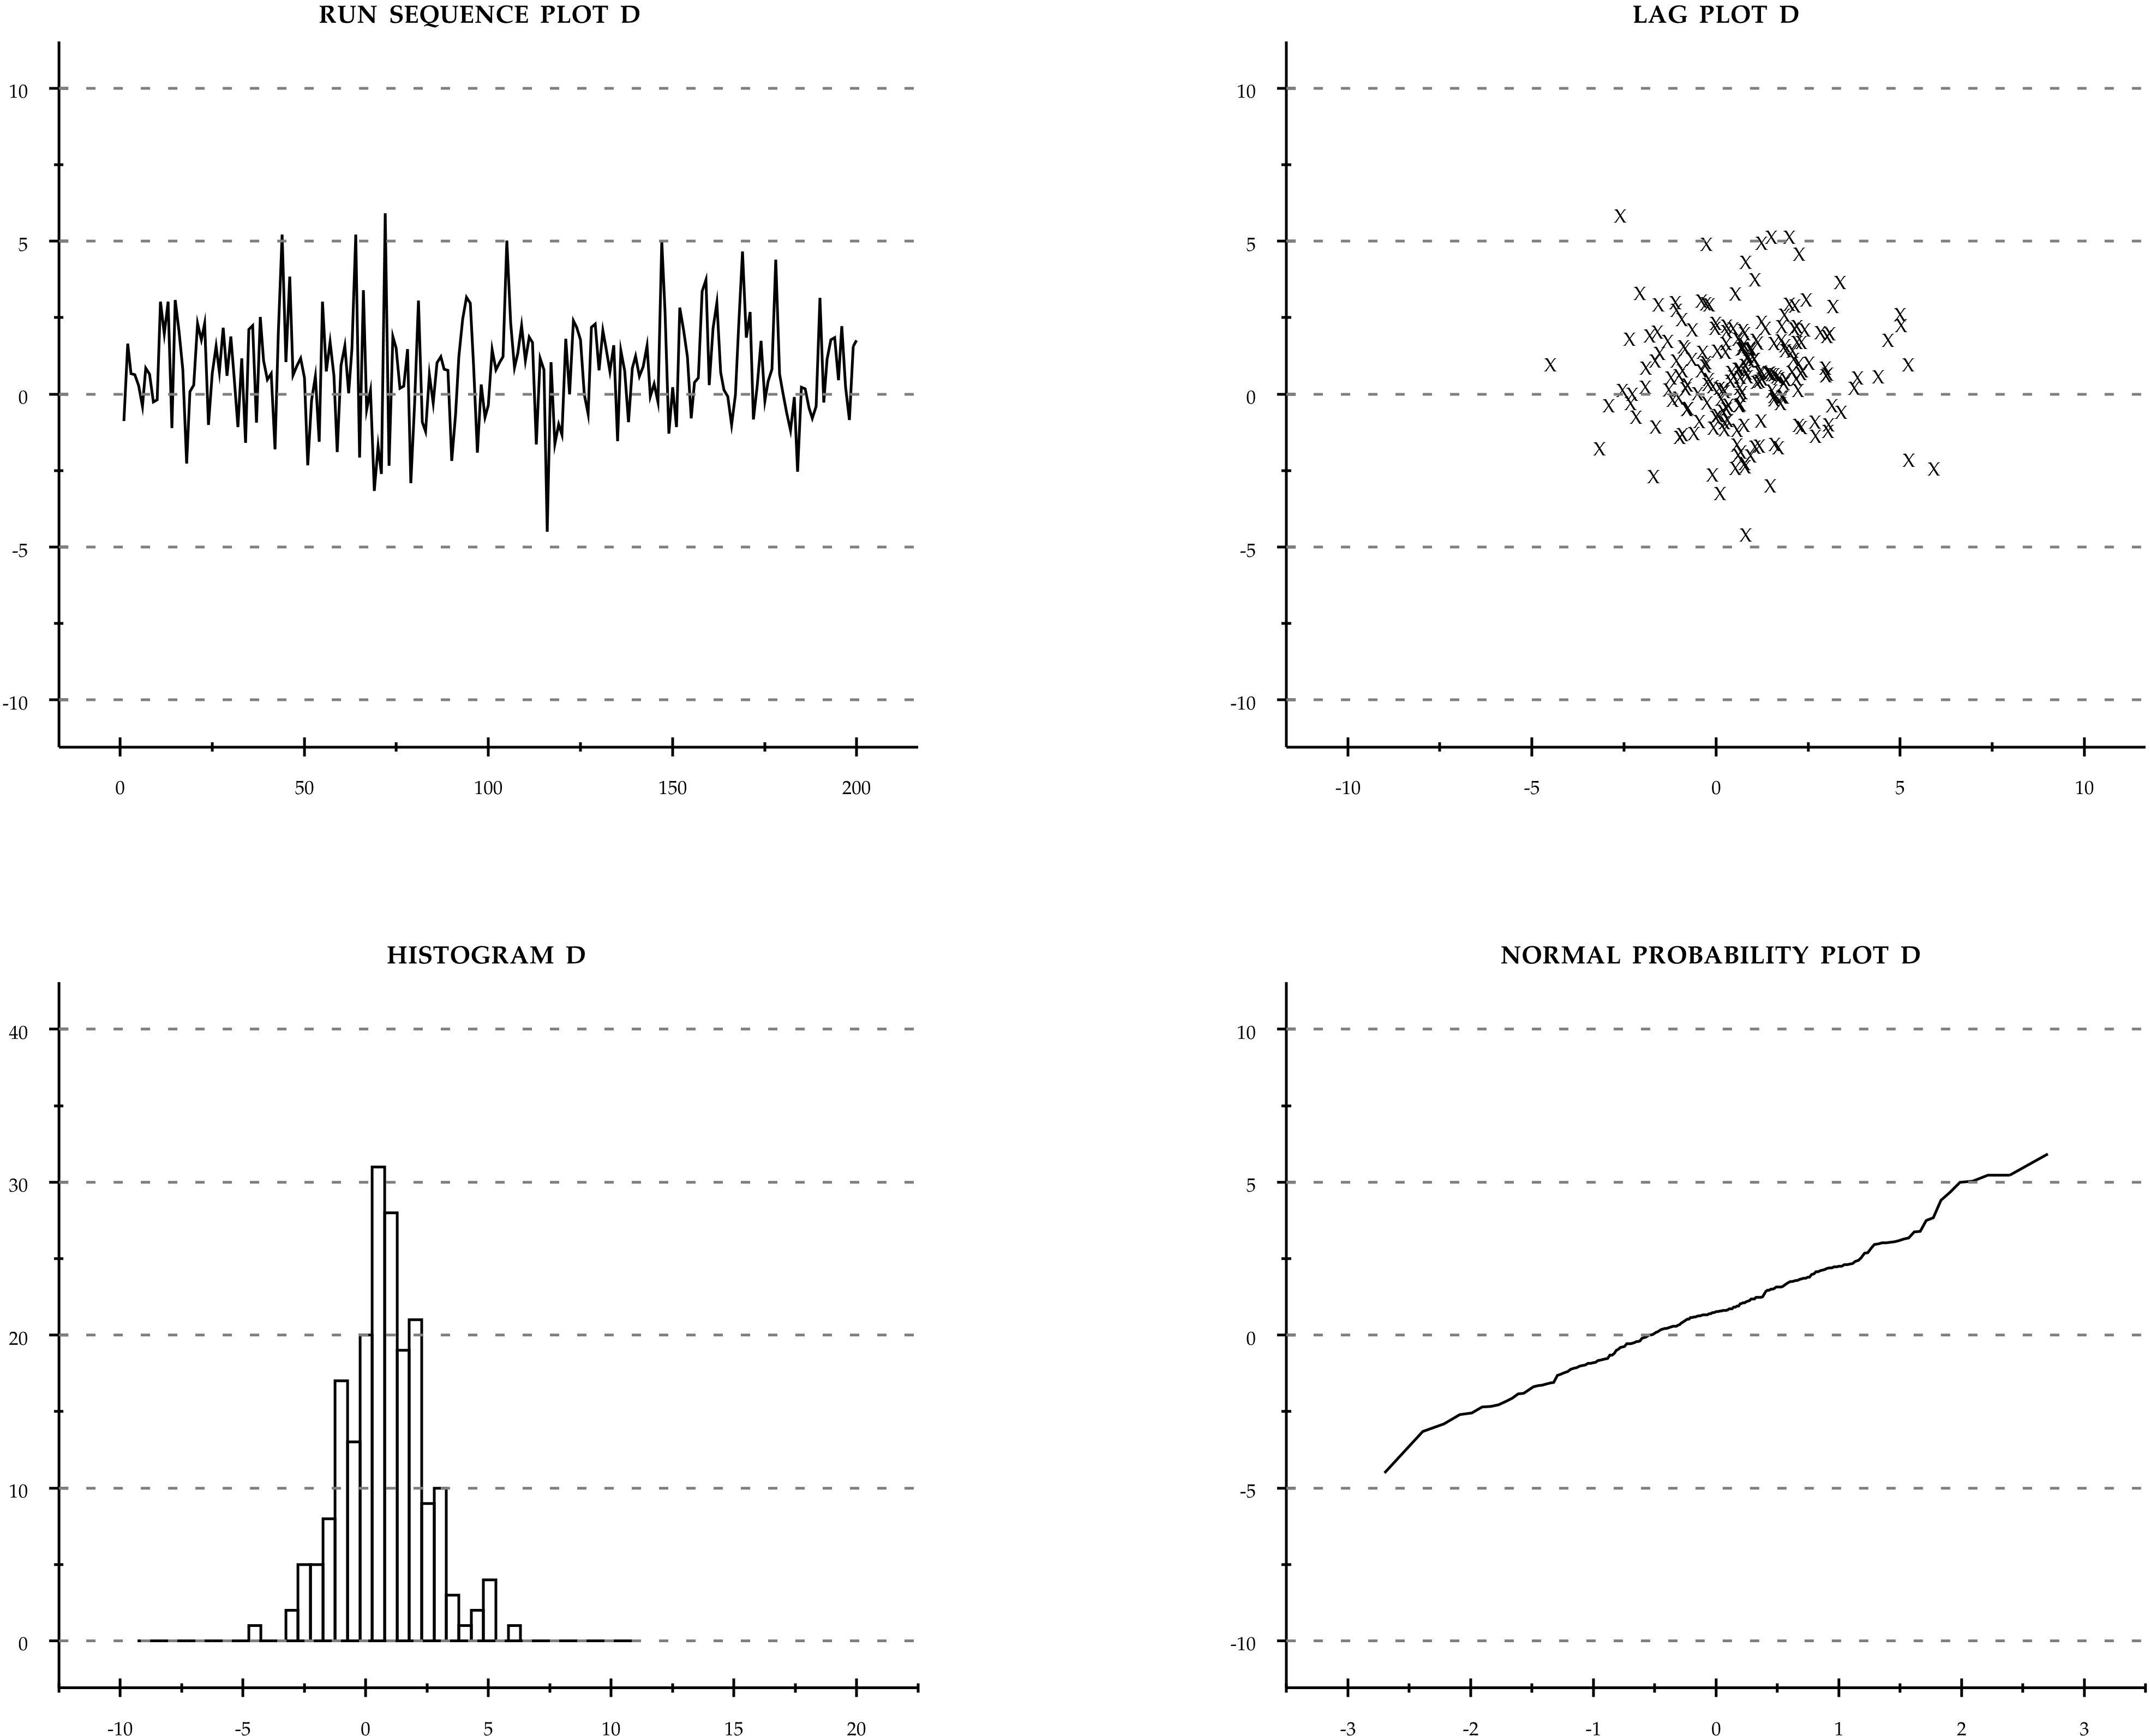

In [17]:
# Examine 4-Plot to Check if Daughter's Family Size Has Unaccounted for Structure
file_path = "/mnt/d/GitHub_Repositories/Netanomics_Analysts_Collaborative_Environment/Workflow_Demonstration/Analyses/Figures/Two_Moms_4Plot.png"
img = Image.open(file_path)
display(img)

In [18]:
# Exiting Dataplot for Now
dp.sendline("exit")  
dp.expect(r">")

0

<div style="font-size:12pt; font-weight:bold;">Specifying & Estimating the Model</div>

In [5]:
%%R
#   Compiling Model
    mod <- cmdstan_model("/mnt/d/GitHub_Repositories/Netanomics_Analysts_Collaborative_Environment/Workflow_Demonstration/Stan_models/Two_Moms_MultivariateNormal.stan")
  
#   Checking Model
    mod$print()

//Two Moms Model with Prior, Posterior, Likelihood, & MAP Estimates Included
//Implementing McElreath's Multivariate Normal Distribution Specification
//Included Cholesky Factorization to Handle the Multi-Collinearity Issues Causing Poor Posterior Exploration
//Jonathan H. Morgan, Ph.D.
//22 January 2025

data {
    int<lower=1> N;                   // Number of observations
    array[N] int<lower=0, upper=1> B1; // First sibling's birth order (binary)
    array[N] int<lower=0, upper=1> B2; // Second sibling's birth order (binary)
    vector[N] M;                      // Family sizes (Mom model)
    array[N] real D;                  // Outcome variable (Daughter model)
}

parameters {
    real a1;                          // Intercept for Mom model
    real a2;                          // Intercept for Daughter model
    real b;                           // Effect of B1 and B2
    real m;                           // Effect of M on D
    real<lower=0> sigma_M;            // Standard de

Model executable is up to date!


<div style="font-size:10pt; font-weight:bold;">Analytic Strategy</div>
<div style="font-size:10pt;"> In the causal salad model, McElreath treats Mother and Daughter family sizes as arising from a multi-normal distribution. 𝑀 (Mothers' family size) and 𝐷 (Daughters' family size) are jointly modeled as arising from a multivariate normal distribution. This approach allows McElreath to account for the influence of an unmeasured variable 𝑈 that may simultaneously affect both 𝑀 and 𝐷. While 𝑈 is not explicitly included in the model, its effects are captured indirectly through the covariance structure of the multivariate normal. Specifically, the off-diagonal elements of the covariance matrix (Σ) represent the shared variability between 𝑀 and 𝐷 that could be attributed to 𝑈, such as socio-economic status,  cultural factors, or genetic influences in the Two Moms' example. By modeling 𝑀 and 𝐷 jointly, he isolates the direct effect of 𝑀 on 𝐷 (quantified by the parameter 𝑚) from this shared variability, reducing the risk of confounding. Additionally, this approach respects the fact that 𝑀 and 𝐷 are not independent and improves the robustness of the estimates for 𝑚 while still accounting for other covariates like birth order (𝐵1and 𝐵2).</div>

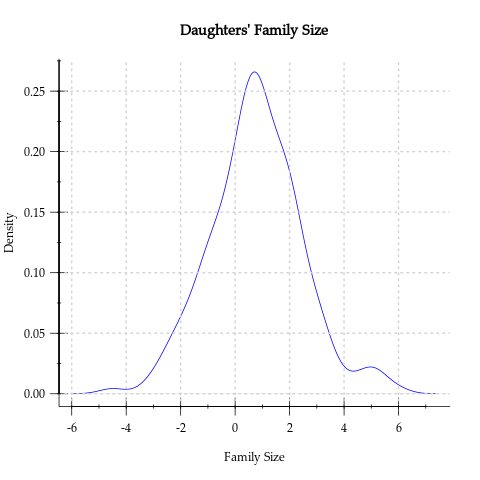

In [6]:
%%R
#   Set Working Directory
    setwd("/mnt/d/GitHub_Repositories/Netanomics_Analysts_Collaborative_Environment/Workflow_Demonstration/R_functions")

#   Load Data
    load("two_moms.Rda")

#   Setting Temporary Directory
    temp <- tempdir()

#   Quickly Visualizing Data
    par(family = "Palatino Linotype")
    plot(density(two_moms$D), xlab="Family Size", las=1, main="Daughters' Family Size", tck=0.025, bty='L', col='blue')
    grid(lwd = 2)
    dataplot_tick_function(0.025, 0.25)

In [7]:
%%R
#   Specifying Input Data Objects
    data <- list(N = length(two_moms$M), B1 = two_moms$B1, B2 = two_moms$B2, 
                 M = two_moms$M, D = two_moms$D)

#   Saving Input Data
    save(data, file='Two_Moms_Input_Data.Rdata')

In [8]:
%%R
# Fitting the Model
  fit <- mod$sample(
    data = data,
    output_dir = temp,
    seed = 123,
    chains = 4,
    thin = 1,
    parallel_chains = 4,
    iter_warmup = 2000,
    iter_sampling = 2000,
    adapt_delta = 0.99,
    max_treedepth = 15,
    refresh = 500
  )
    
  # Checking that the Model Passes: E-BFMI, Treedepth, Sample Size, & R-Hat Cursory Checks
    fit$cmdstan_diagnose()  

Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 4 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 3 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 1 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 2 Iteration: 1000 / 4000 [ 25%]  (Warmup) 
Chain 4 Iteration: 1000 / 4000 [ 25%]  (Warmup) 
Chain 3 Iteration: 1000 / 4000 [ 25%]  (Warmup) 
Chain 1 Iteration: 1000 / 4000 [ 25%]  (Warmup) 
Chain 2 Iteration: 1500 / 4000 [ 37%]  (Warmup) 
Chain 3 Iteration: 1500 / 4000 [ 37%]  (Warmup) 
Chain 4 Iteration: 1500 / 4000 [ 37%]  (Warmup) 
Chain 1 Iteration: 1500 / 4000 [ 37%]  (Warmup) 
Chain 2 Iteration: 2000 / 4000 [ 50%]  (Warmup) 
Chain 2 Iteration: 2001 / 4000 [ 50%]  (Sampling) 
Chain 3 Iteration: 2000 / 4000 [ 50%]  (Warmup) 
Chain 3 Iteration: 2001 / 4

In [9]:
%%R
#   Getting Posterior Draws
     <- fit$draws()
    str(draws_ardraws_arrayray)
    
#   Converting to data frame 
    draws_df <- as_draws_df(draws_array)
    draws_df <- as.data.frame(draws_df)

#   Saving Draws Data
    save(draws_df, file='Two_Moms_Data_Draws.Rdata')

 'draws_array' num [1:2000, 1:4, 1:3017] -599 -596 -596 -595 -596 ...
 - attr(*, "dimnames")=List of 3
  ..$ iteration: chr [1:2000] "1" "2" "3" "4" ...
  ..$ chain    : chr [1:4] "1" "2" "3" "4"
  ..$ variable : chr [1:3017] "lp__" "a1" "a2" "b" ...


In [10]:
%%R
#   Creating Fit Objects
    sfit <- fit$output_files() %>%
      rstan::read_stan_csv()
    
#   Creating Summary Object
    rstan_summary <- rstan::summary(sfit)
    rstan_summary <- rstan_summary$summary
    rstan_summary <- as.data.frame(rstan_summary)

#   Saving Summary Data
    save(rstan_summary, file='Two_Moms_Data_Summary.Rdata')

In [11]:
%%R
#   Creating Diagnostics Object
    diagnostics_df <- as_draws_df(fit$sampler_diagnostics())
    diagnostics_df <- as.data.frame(diagnostics_df)

#   Saving Diagnostic Data
    save(diagnostics_df, file='Two_Moms_Data_Diagnostics.Rdata')

In [13]:
%%R
# Isolating Prior Predictive Distributions for Mothers' Family Sizes & Daughters' Family Sizes
  m_prior_pred <- as.data.frame(sfit, pars = "prior_M")
  d_prior_pred <- as.data.frame(sfit, pars = "prior_D")

# Saving Posterior Predictive Distributions
  save(m_prior_pred, file='Two_Moms_Mother_PriorPred.Rdata') 
  save(d_prior_pred, file='Two_Moms_Daughter_PriorPred.Rdata') 

In [12]:
%%R
# Isolating Posterior Predictive Distributions for Mothers' Family Sizes & Daughters' Family Sizes
  m_post_pred <- as.data.frame(sfit, pars = "posterior_M")
  d_post_pred <- as.data.frame(sfit, pars = "posterior_D")

# Saving Posterior Predictive Distributions
  save(m_post_pred, file='Two_Moms_Mother_PostPred.Rdata') 
  save(d_post_pred, file='Two_Moms_Daughter_PostPred.Rdata') 

In [24]:
%%R
# Analyzed Variables
  alpha_posteriors <- row.names(rstan_summary)[grepl("a", row.names(rstan_summary))]
  beta_posteriors <- row.names(rstan_summary)[grepl("b", row.names(rstan_summary))]
  m_posterior <-  row.names(rstan_summary)[grepl("m", row.names(rstan_summary))]
  variables <- c(alpha_posteriors, beta_posteriors, m_posterior)
  chain_values <- matrix(c(1, 2001, 4001, 6001, 2000, 4000, 6000, 8000),ncol=2, nrow=4)
    
# Creating Posterior List
  posterior_list <- vector('list', length(variables))
  names(posterior_list) <- variables
  for (i in seq_along(posterior_list)) {
    posterior_list[[i]] <- vector('list', 4)
  }
    
  for (i in seq_along(variables)) {
    var_draws <- draws_df[ ,c(variables[[i]])]
    for (j in seq_along(posterior_list[[i]])){
      iteration_values <- chain_values[j, ]
      posterior_list[[i]][[j]] <- var_draws[c(iteration_values[[1]]:iteration_values[[2]])]
      rm(iteration_values)
    }
    rm(var_draws)
  }

# Saving Posterior List
  save(posterior_list, file='Two_Moms_PosteriorList.Rdata')  

<div style="font-size:12pt; font-weight:bold;">Convergence Checks</div>

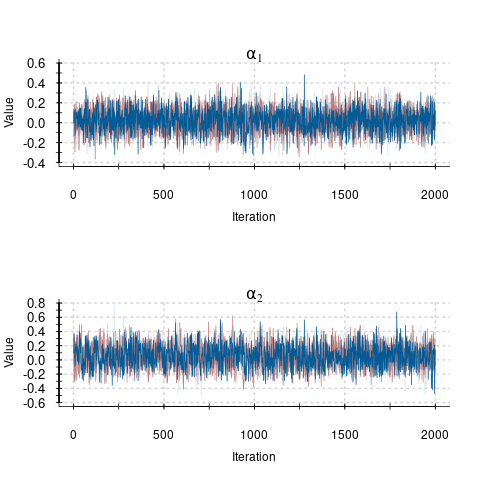

In [ ]:
%%R  
#   Evaluating Mothers' (a1) and Daughters' (a2) Intercepts
    layout.matrix <- matrix(c(1,2), nrow = 2, ncol = 1)
    layout(mat = layout.matrix) # Widths of the two columns
    layout.show(n=2)
    
    plot_list <- posterior_list[c(1:2)]
    plot_names <- c('alpha[1]', 'alpha[2]')
    for (i in seq_along(plot_list)){
      chains_visualization(plot_names[[i]], plot_list[[i]])
    }

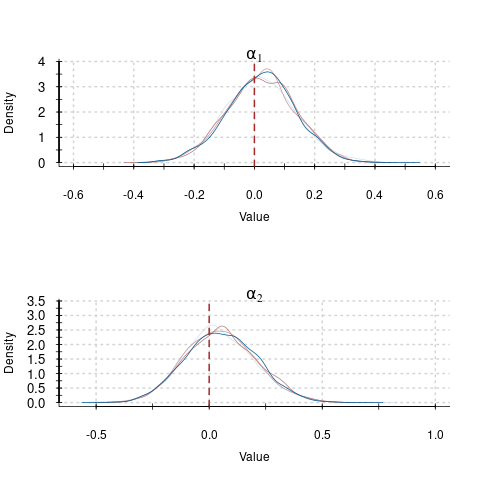

In [ ]:
%%R
#   Evaluating Mothers' (a1) and Daughters' (a2) Intercepts
    layout.matrix <- matrix(c(1,2), nrow = 2, ncol = 1)
    layout(mat = layout.matrix) # Widths of the two columns
    layout.show(n=2)

#   Looking at Intercept Posteriors for Mothers' & Daughters'
    for (i in seq_along(plot_list)){
      density_visualization(plot_names[[i]], plot_list[[i]])
    }

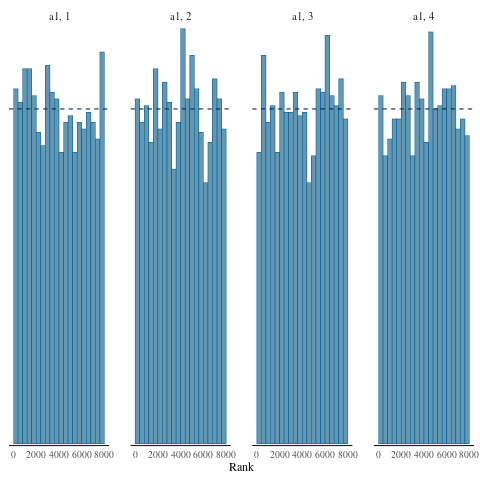

In [41]:
%%R
#   Look at how the ranking of MCMC samples mixed between chains for Alpha.
    mcmc_rank_hist(draws_array, "a1", ref_line = TRUE)

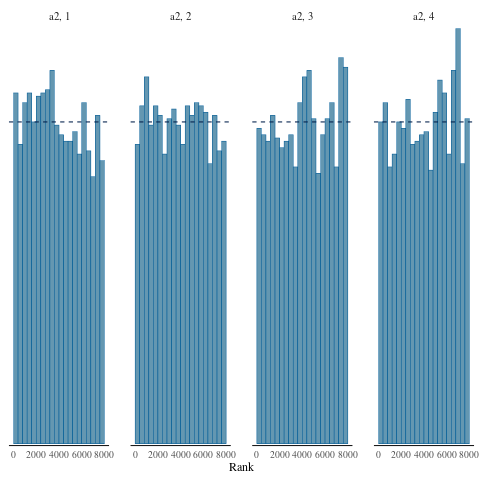

In [42]:
%%R
#   Look at how the ranking of MCMC samples mixed between chains for Alpha.
    mcmc_rank_hist(draws_array, "a2", ref_line = TRUE)

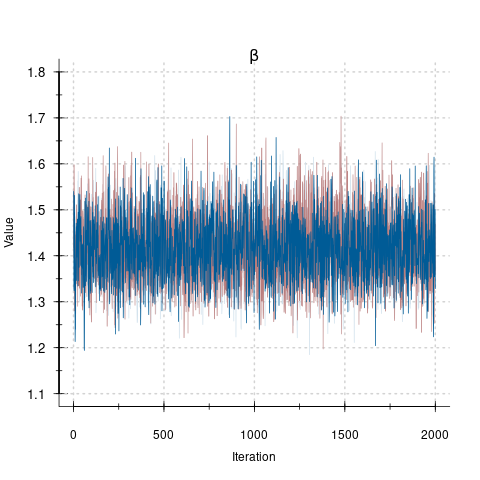

In [33]:
%%R  
#   Evaluating the Effect of Birth Order: The Model Assume the Effect is the Same for Both Mothers' & Daughters'
    layout.matrix <- matrix(c(1), nrow = 1, ncol = 1)
    layout(mat = layout.matrix) # Widths of the two columns
    layout.show(n=2)
    
    plot_list <- posterior_list[c(3)]
    plot_names <- c('beta')
    for (i in seq_along(plot_list)){
      chains_visualization(plot_names[[i]], plot_list[[i]])
    }

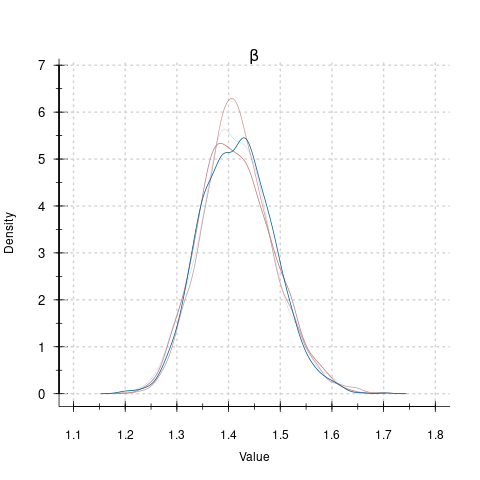

In [34]:
%%R  
#   Evaluating the Effect of Birth Order 
    layout.matrix <- matrix(c(1), nrow = 1, ncol = 1)
    layout(mat = layout.matrix) # Widths of the two columns
    layout.show(n=2)
    
    plot_list <- posterior_list[c(3)]
    plot_names <- c('beta')
    for (i in seq_along(plot_list)){
      density_visualization(plot_names[[i]], plot_list[[i]])
    }

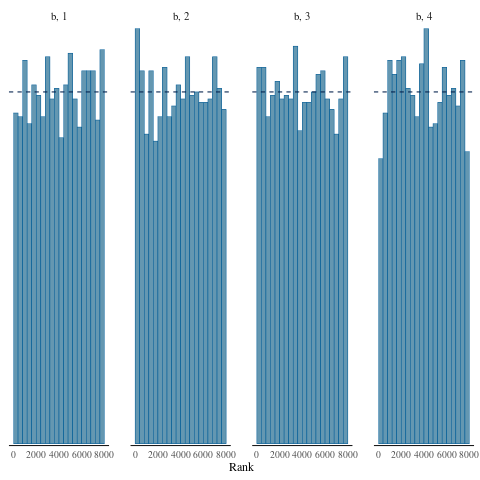

In [43]:
%%R
#   Look at how the ranking of MCMC samples mixed between chains for Beta.
    mcmc_rank_hist(draws_array, "b", ref_line = TRUE)

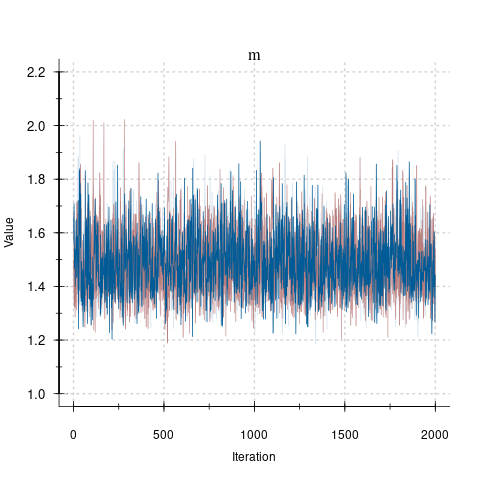

In [35]:
%%R  
#   Evaluating the Effect of Mothers' Family Size on Daughters' Family Size
    layout.matrix <- matrix(c(1), nrow = 1, ncol = 1)
    layout(mat = layout.matrix) # Widths of the two columns
    layout.show(n=2)
    
    plot_list <- posterior_list[c(4)]
    plot_names <- c('m')
    for (i in seq_along(plot_list)){
      chains_visualization(plot_names[[i]], plot_list[[i]])
    }

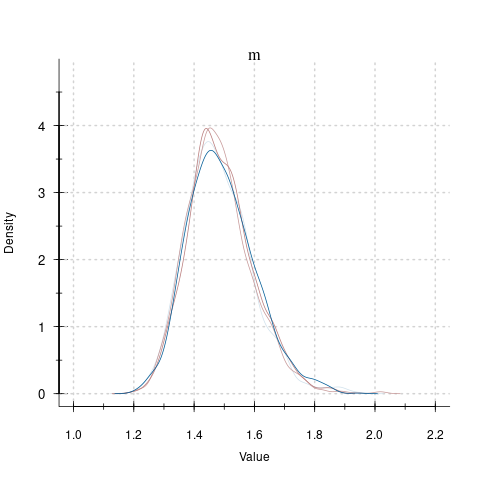

In [37]:
%%R  
#   Evaluating the Effect of Birth Order 
    layout.matrix <- matrix(c(1), nrow = 1, ncol = 1)
    layout(mat = layout.matrix) # Widths of the two columns
    layout.show(n=2)
    
    plot_list <- posterior_list[c(4)]
    plot_names <- c('m')
    for (i in seq_along(plot_list)){
      density_visualization(plot_names[[i]], plot_list[[i]])
    }

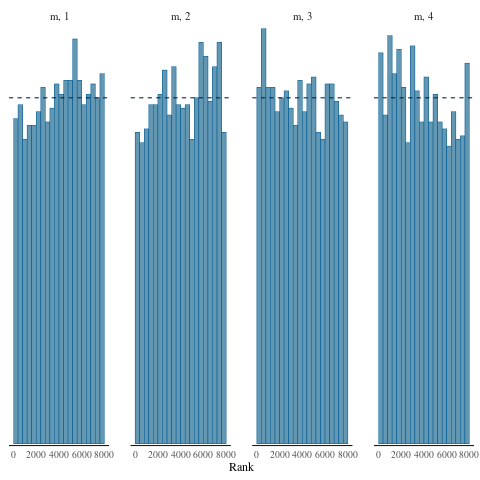

In [44]:
%%R
#   Look at how the ranking of MCMC samples mixed between chains for Mother's Family Size.
    mcmc_rank_hist(draws_array, "m", ref_line = TRUE)

<div style="font-size:12pt; font-weight:bold;">Prior Prdictive Checks</div>

<div style="font-size:12pt; font-weight:bold;">Model Evaluation: Posterior Distributions & PSIS-LOO</div>

<div style="font-size:12pt; font-weight:bold;">Estimating Bayes Factor Against the Null</div>

<div style="font-size:12pt; font-weight:bold;">Posterior Predictive Checks</div>

<div style="font-size:12pt; font-weight:bold;">Error Analysis Using Maximum a Posteriori (MAP) Estimation</div>